## Face detection con OpenCV

Una de las viejas formas (2001),  Para hacer una deteccion de Rostros es usar un clasificador: Haar cascade; este tipo de clasificador es usado en OpenCV para encontrar features y en una imagen siguiendo un proceso de cascada para encontrar rostros


[Aqui pueden encontar el articulo original](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf).


In [1]:
# Librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2                     

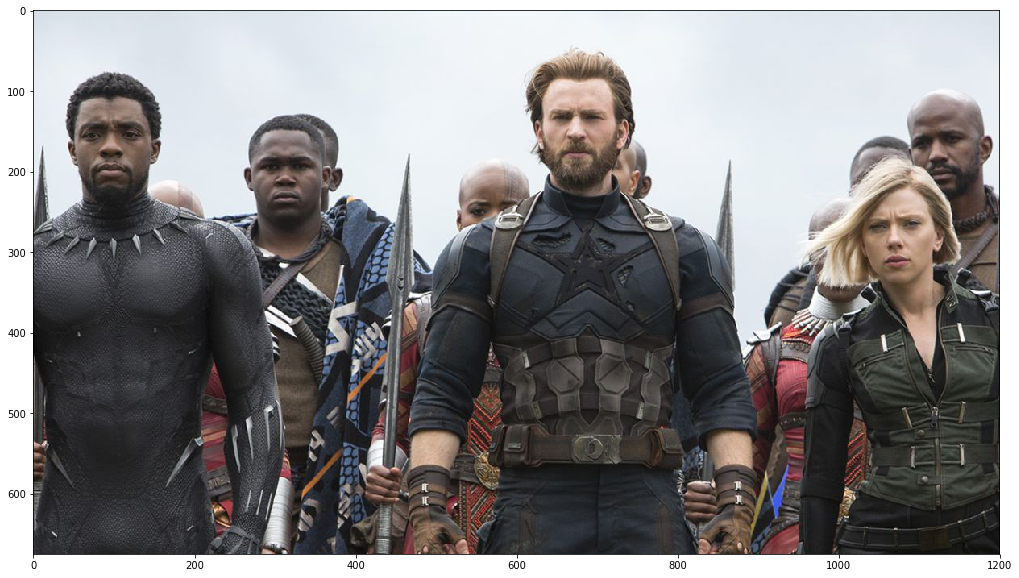

In [2]:
# Cargar la imagen a color
#image = cv2.imread('images/ironman_last_night.png')
image = cv2.imread('images/avengers.jpg')
#image = cv2.imread('images/drake_meme.jpg')
#image = cv2.imread('images/people.jpg')


# Convertir a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

Para implementar un detector de rostros, lo primero que haremos es convertir la imagen a escala de grises. Esto es totalmente compatible puesto que para identificar un rostro solo es necesario tomar encuenta la estructura del rostro y no su color.


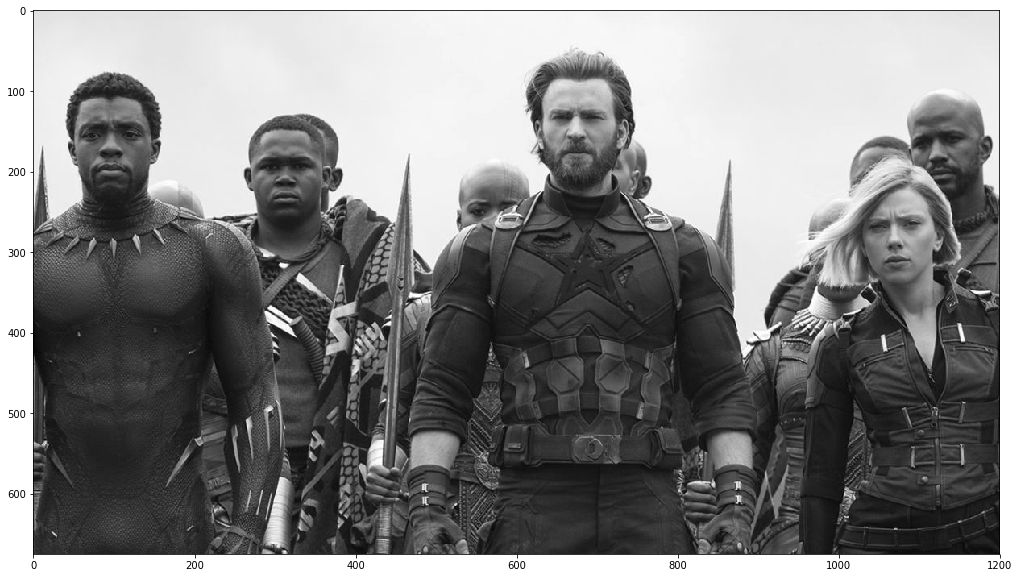

In [3]:
# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

Ahora cargaremos un modelo prevamente construido que se encuentra en `files/ haarcascade_frontalface_default.xml` y usarlo para identificar los rostros

**Descripcion de parametros** 

El numero de imagenes detectadas es definido por: `detectMultiScale` este se utiliza para detectar diferentes tamaños de imagenes. Los parametros para esta función son los siguientes: `(image, scaleFactor, minNeighbors)`; Por lo regular se detectaran mas imagenes con valores pequeños en el `scaleFactor` y valores menores para `minNeighbors`, Pero al incrementar estos valores se obtendra un mejor performance. Modificaremos estos valores para ajustarce a las imagenes de entrada.

In [26]:
# Cargar modelo
face_cascade = cv2.CascadeClassifier('files/haarcascade_frontalface_default.xml')

# Ejecutar modelo sobre la imagen en escala de grises
#faces = face_cascade.detectMultiScale(gray, 4, 6)

faces = face_cascade.detectMultiScale(gray, 1.5, 2)

Esta funcion retornara un array de detecciones, coordenadas que definen la posicion y el tamaño de cuadros que rodean los rostros.

In [27]:
print ('Se han encontrado ' + str(len(faces)) + ' rostros en esta imagen')
print ("Las coordenadas y tamaños son los siguientes")
print ('=============================')
print (faces)

Se han encontrado 4 rostros en esta imagen
Las coordenadas y tamaños son los siguientes
[[ 614   86  122  122]
 [  35  105  122  122]
 [1082  134   81   81]
 [1009  220  122  122]]


### Ahora procederemos a dibujar estos cuadros sobre la imagen original

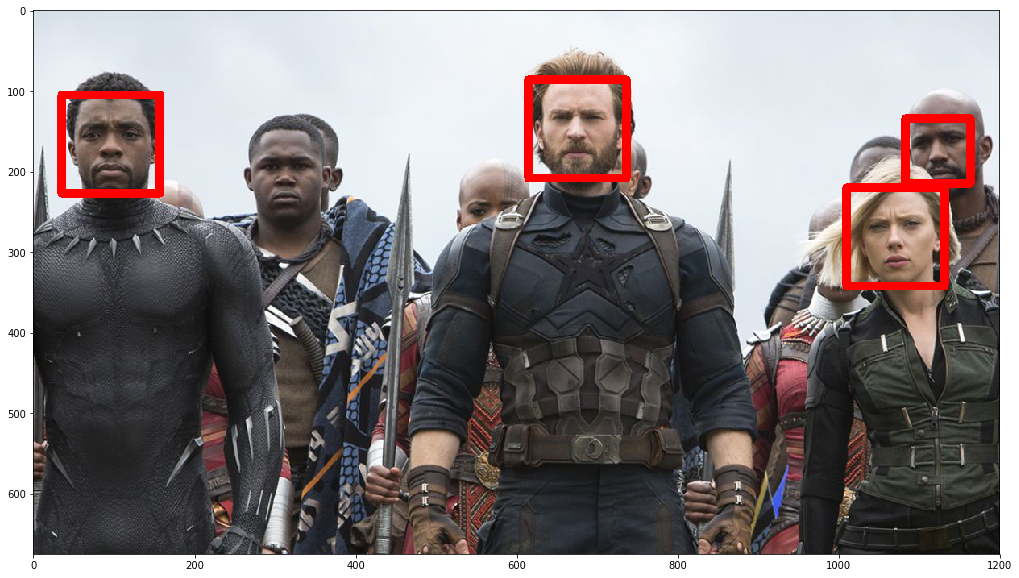

In [28]:
img_with_detections = np.copy(image) # Hacemos una copia de la imagen original

# Iterar sobre las caras encontradas
for (x,y,w,h) in faces:
    # Dibujamos los cuadros sobre la imagen original
    # El cuarto elemento describe el color en RGB
    # Y el ultimo parametro es utilizado para definir el grosor de la linea
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),10)  


plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)

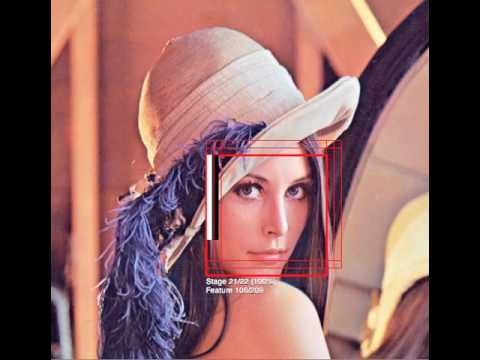

In [7]:
from IPython.display import Audio,Image, YouTubeVideo
YouTubeVideo(id='zokoTyPjzrI',width=350,height=300)
